# Deep learning

Deep learning (also known as deep structured learning or hierarchical learning) is part of a broader family of machine learning methods.<br>
Deep learning architectures such as deep neural networks, deep belief networks and recurrent neural networks have been applied to fields including computer vision, speech recognition, natural language processing, audio recognition, social network filtering, machine translation, bioinformatics, drug design and board game programs, where they have produced results comparable to and in some cases superior to human experts.<br>

Deep learning is a class of machine learning algorithms that:

Use a cascade of multiple layers of nonlinear processing units for feature extraction and transformation. Each successive layer uses the output from the previous layer as input.<br>
Learn in supervised (e.g., classification) and/or unsupervised (e.g., pattern analysis) manners.<br>
Learn multiple levels of representations that correspond to different levels of abstraction; the levels form a hierarchy of concepts.

## Part 1: Data exploration
### Understand raw data

In [8]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import sklearn
%matplotlib inline

In [9]:
pd.set_option('display.max_columns', None)# display all the columns
raw_data = pd.read_csv('20_bit_mutliplexer_2000_01.txt', sep = "\t")# read in dataset

In [10]:
raw_data.head()

,A_0,A_1,A_2,A_3,R_0,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9,R_10,R_11,R_12,R_13,R_14,R_15,Class
0,1,0,1,1,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,1,0,1,1,0
2,0,0,1,1,1,0,0,0,1,0,0,1,1,1,1,1,1,0,1,0,0
3,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0
4,1,0,1,0,0,0,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1


In [11]:
print ("Number of rows: " + str(raw_data.shape[0])) # row count
print ("Number of columns: " + str(raw_data.shape[1])) # column count

Number of rows: 2000
Number of columns: 21


In [12]:
raw_data.describe() # descriptive statistics 

,A_0,A_1,A_2,A_3,R_0,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9,R_10,R_11,R_12,R_13,R_14,R_15,Class
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.503000,0.510000,0.499000,0.497500,0.494500,0.507500,0.489500,0.500500,0.487000,0.492000,0.510000,0.492000,0.487000,0.485500,0.503000,0.4850,0.507000,0.513000,0.498500,0.499000,0.491000
std,0.500116,0.500025,0.500124,0.500119,0.500095,0.500069,0.500015,0.500125,0.499956,0.500061,0.500025,0.500061,0.499956,0.499915,0.500116,0.4999,0.500076,0.499956,0.500123,0.500124,0.500044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.0000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
raw_data.isnull().values.any() # check missing data

False

### Understand the features

Text(0,0.5,'Count')

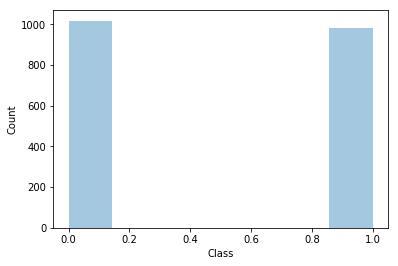

In [14]:
sb.distplot(raw_data['Class'],kde=False) # The outcome is labeled as 'class'
plt.ylabel("Count")

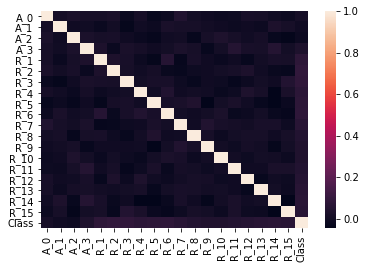

In [15]:
# Use heat map to visualize correlation between each column
corr = raw_data[['A_0','A_1','A_2','A_3','R_1','R_2','R_3','R_4','R_5','R_6','R_7','R_8','R_9','R_10','R_11','R_12','R_13','R_14','R_15','Class']].corr()
sb.heatmap(corr)

In [16]:
corr

,A_0,A_1,A_2,A_3,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9,R_10,R_11,R_12,R_13,R_14,R_15,Class
A_0,1.000000,0.011883,0.030013,0.017031,0.016912,0.023132,-0.019006,0.010160,-0.025908,-0.014123,0.044102,0.006158,-0.004828,-0.012036,-0.009825,0.021919,0.017850,-0.000982,-0.013988,0.010110
A_1,0.011883,1.000000,-0.005961,-0.000900,-0.015305,0.003421,-0.033027,0.000520,-0.013684,0.023609,0.016325,0.014528,0.005583,-0.004121,-0.013409,-0.004281,-0.012527,0.031066,0.016043,-0.003641
A_2,0.030013,-0.005961,1.000000,0.028990,0.015032,0.020963,-0.004998,-0.018058,-0.030036,0.000040,0.003969,-0.028062,0.014948,0.038013,0.017948,0.000028,0.012056,-0.023006,-0.038004,-0.012038
A_3,0.017031,-0.000900,0.028990,1.000000,0.034079,-0.018109,0.024005,0.012875,-0.003080,0.009102,0.028924,0.014875,-0.026156,0.007030,0.050874,0.021072,0.015135,0.053986,0.008990,0.036916
R_1,0.016912,-0.015305,0.015032,0.034079,1.000000,0.032326,0.017987,-0.012616,-0.034768,0.056718,-0.030767,0.019399,-0.003567,-0.017092,-0.006554,-0.025215,0.002611,0.022048,0.015032,0.075291
R_2,0.023132,0.003421,0.020963,-0.018109,0.032326,1.000000,0.014024,-0.001547,0.012668,-0.020589,-0.025345,-0.007550,-0.004612,0.009128,0.016381,0.031304,-0.000454,-0.020068,-0.025048,0.088656
R_3,-0.019006,-0.033027,-0.004998,0.024005,0.017987,0.014024,1.000000,0.007028,0.019018,0.018984,-0.008985,-0.024982,-0.003973,-0.009006,-0.028983,-0.013015,0.006976,-0.005997,0.049002,0.087032
R_4,0.010160,0.000520,-0.018058,0.012875,-0.012616,-0.001547,0.007028,1.000000,-0.002417,0.044544,-0.004418,0.005328,-0.001755,-0.021852,-0.008787,0.036380,0.014686,-0.047094,0.023956,0.071568
R_5,-0.025908,-0.013684,-0.030036,-0.003080,-0.034768,0.012668,0.019018,-0.002417,1.000000,0.020327,0.025751,0.041603,-0.047490,0.008097,0.025535,0.000224,-0.025596,-0.047054,-0.018034,0.075734
R_6,-0.014123,0.023609,0.000040,0.009102,0.056718,-0.020589,0.018984,0.044544,0.020327,1.000000,0.008323,-0.005483,0.009586,0.027886,-0.021414,-0.014284,0.007484,-0.018944,-0.029966,0.080389


In [17]:
y = raw_data.iloc[:, -1].values
X = raw_data.iloc[:, :-1].values

## Part 2: Deep learning

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold

In [19]:
np.random.seed(0)

In [20]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [21]:
cv_scores = []

In [32]:
for train, test in kfold.split(X, y):
     
    model = Sequential()
    model.add(Dense(11, input_dim=20, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
     
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X[train], y[train], epochs=50,batch_size=10, verbose=0)
    
    scores = model.evaluate(X[test], y[test], verbose=0)
    cv_scores.append(scores[1] * 100)
print("Accuracy: " + "%.2f%% +/- %.2f%%" % (np.mean(cv_scores), np.std(cv_scores)))

Accuracy: 68.23% +/- 3.27%


### Change activation function  
Try TanH

In [34]:
cv_scores = []
for train, test in kfold.split(X, y):
     
    model = Sequential()
    model.add(Dense(11, input_dim=20, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
     
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X[train], y[train], epochs=50,batch_size=10, verbose=0)
    
    scores = model.evaluate(X[test], y[test], verbose=0)
    cv_scores.append(scores[1] * 100)
print("Accuracy: " + "%.2f%% +/- %.2f%%" % (np.mean(cv_scores), np.std(cv_scores)))

Accuracy: 65.29% +/- 2.37%


Try Sigmoid

In [36]:
cv_scores = []
for train, test in kfold.split(X, y):
     
    model = Sequential()
    model.add(Dense(11, input_dim=20, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
     
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X[train], y[train], epochs=50,batch_size=10, verbose=0)
    
    scores = model.evaluate(X[test], y[test], verbose=0)
    cv_scores.append(scores[1] * 100)
print("Accuracy: " + "%.2f%% +/- %.2f%%" % (np.mean(cv_scores), np.std(cv_scores)))

Accuracy: 60.85% +/- 4.59%


From above, activation function relu seems to have the best performance. Thus, I will continue with relu.

### Change hidden layer size

Try a smaller hidden layer size: 6

In [40]:
cv_scores = []
for train, test in kfold.split(X, y):
     
    model = Sequential()
    model.add(Dense(6, input_dim=20, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
     
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X[train], y[train], epochs=50,batch_size=10, verbose=0)
    
    scores = model.evaluate(X[test], y[test], verbose=0)
    cv_scores.append(scores[1] * 100)
print("Accuracy: " + "%.2f%% +/- %.2f%%" % (np.mean(cv_scores), np.std(cv_scores)))

Accuracy: 63.65% +/- 4.37%


Try a bigger hidden layer size: 16

In [41]:
cv_scores = []
for train, test in kfold.split(X, y):
     
    model = Sequential()
    model.add(Dense(16, input_dim=20, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
     
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X[train], y[train], epochs=50,batch_size=10, verbose=0)
    
    scores = model.evaluate(X[test], y[test], verbose=0)
    cv_scores.append(scores[1] * 100)
print("Accuracy: " + "%.2f%% +/- %.2f%%" % (np.mean(cv_scores), np.std(cv_scores)))

Accuracy: 70.35% +/- 2.31%


Hidden layer size 16 has better performance here. 

### Change hidden layer number

Try two hidden layers with size 16 and 6, respectively.

In [43]:
cv_scores = []
for train, test in kfold.split(X, y):
     
    model = Sequential()
    model.add(Dense(16, input_dim=20, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
     
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X[train], y[train], epochs=50,batch_size=10, verbose=0)
    
    scores = model.evaluate(X[test], y[test], verbose=0)
    cv_scores.append(scores[1] * 100)
print("Accuracy: " + "%.2f%% +/- %.2f%%" % (np.mean(cv_scores), np.std(cv_scores)))

Accuracy: 72.30% +/- 3.20%


Try two hidden layers with size 16 and 11, respectively.

In [44]:
cv_scores = []
for train, test in kfold.split(X, y):
     
    model = Sequential()
    model.add(Dense(16, input_dim=20, activation='relu'))
    model.add(Dense(11, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
     
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X[train], y[train], epochs=50,batch_size=10, verbose=0)
    
    scores = model.evaluate(X[test], y[test], verbose=0)
    cv_scores.append(scores[1] * 100)
print("Accuracy: " + "%.2f%% +/- %.2f%%" % (np.mean(cv_scores), np.std(cv_scores)))

Accuracy: 73.80% +/- 2.56%


Try two hidden layers with size 16 and 16, respectively.

In [45]:
cv_scores = []
for train, test in kfold.split(X, y):
     
    model = Sequential()
    model.add(Dense(16, input_dim=20, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
     
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X[train], y[train], epochs=50,batch_size=10, verbose=0)
    
    scores = model.evaluate(X[test], y[test], verbose=0)
    cv_scores.append(scores[1] * 100)
print("Accuracy: " + "%.2f%% +/- %.2f%%" % (np.mean(cv_scores), np.std(cv_scores)))

Accuracy: 74.05% +/- 3.57%


Try two hidden layers with size 16 and 21, respectively.

In [46]:
cv_scores = []
for train, test in kfold.split(X, y):
     
    model = Sequential()
    model.add(Dense(16, input_dim=20, activation='relu'))
    model.add(Dense(21, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
     
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X[train], y[train], epochs=50,batch_size=10, verbose=0)
    
    scores = model.evaluate(X[test], y[test], verbose=0)
    cv_scores.append(scores[1] * 100)
print("Accuracy: " + "%.2f%% +/- %.2f%%" % (np.mean(cv_scores), np.std(cv_scores)))

Accuracy: 74.40% +/- 3.70%


Try two hidden layers with size 16 and 26, respectively.

In [48]:
cv_scores = []
for train, test in kfold.split(X, y):
     
    model = Sequential()
    model.add(Dense(16, input_dim=20, activation='relu'))
    model.add(Dense(26, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
     
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X[train], y[train], epochs=50,batch_size=10, verbose=0)
    
    scores = model.evaluate(X[test], y[test], verbose=0)
    cv_scores.append(scores[1] * 100)
print("Accuracy: " + "%.2f%% +/- %.2f%%" % (np.mean(cv_scores), np.std(cv_scores)))

Accuracy: 75.80% +/- 3.11%


Try two hidden layers with size 16 and 31, respectively.

In [49]:
cv_scores = []
for train, test in kfold.split(X, y):
     
    model = Sequential()
    model.add(Dense(16, input_dim=20, activation='relu'))
    model.add(Dense(31, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
     
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X[train], y[train], epochs=50,batch_size=10, verbose=0)
    
    scores = model.evaluate(X[test], y[test], verbose=0)
    cv_scores.append(scores[1] * 100)
print("Accuracy: " + "%.2f%% +/- %.2f%%" % (np.mean(cv_scores), np.std(cv_scores)))

Accuracy: 76.05% +/- 2.72%


Try two hidden layers with size 16 and 41, respectively.

In [51]:
cv_scores = []
for train, test in kfold.split(X, y):
     
    model = Sequential()
    model.add(Dense(16, input_dim=20, activation='relu'))
    model.add(Dense(41, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
     
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X[train], y[train], epochs=50,batch_size=10, verbose=0)
    
    scores = model.evaluate(X[test], y[test], verbose=0)
    cv_scores.append(scores[1] * 100)
print("Accuracy: " + "%.2f%% +/- %.2f%%" % (np.mean(cv_scores), np.std(cv_scores)))

Accuracy: 75.95% +/- 3.17%


References:<br>
https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/<br>
https://keras.io/models/model/<br>
https://towardsdatascience.com/https-medium-com-piotr-skalski92-deep-dive-into-deep-networks-math-17660bc376ba<br>